In [1]:
import pickle
import os
import time
import numpy as np
import ast

import polychrom

from polychrom.hdf5_format import HDF5Reporter, list_URIs, load_URI, load_hdf5_file
import polychrom.contactmaps

import cooltools
import cooltools.lib.plotting

import pandas as pd
import warnings
import h5py 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import sys

/home1/rahmanin/.conda/envs/openwpoly/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openwpoly/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


### making dictionary of trajectories

In [3]:
path_dict = {}

directory = '/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_boundary'

for name  in glob.glob(directory+'/simulations/static_boundary_sims/layout_a/LIFETIME*'):
    path_dict[name.split('layout_a/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))


### creating maps

In [4]:
mapN = 3000
mapstarts = (np.arange(0, 13500, 1500))
min_time = 0
skip_freq = 5
refresh = True
if refresh== True:
    map_dict_eq = {}

for name in path_dict.keys():
    URIs = polychrom.hdf5_format.list_URIs(path_dict[name])
    URIs_eq = np.array(URIs)[np.array([int(i.split("::")[-1]) for i in URIs]) > min_time][::skip_freq]
    mrc = polychrom.contactmaps.monomerResolutionContactMapSubchains(
        URIs_eq,
        mapstarts,
        mapN,
        cutoff=2.3,
        n=8)
    map_dict_eq[name] = mrc
    np.savez_compressed(directory+'/analysis/maps/layout_a/%s.npz' % name, mrc)

/home1/rahmanin/.conda/envs/openwpoly/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


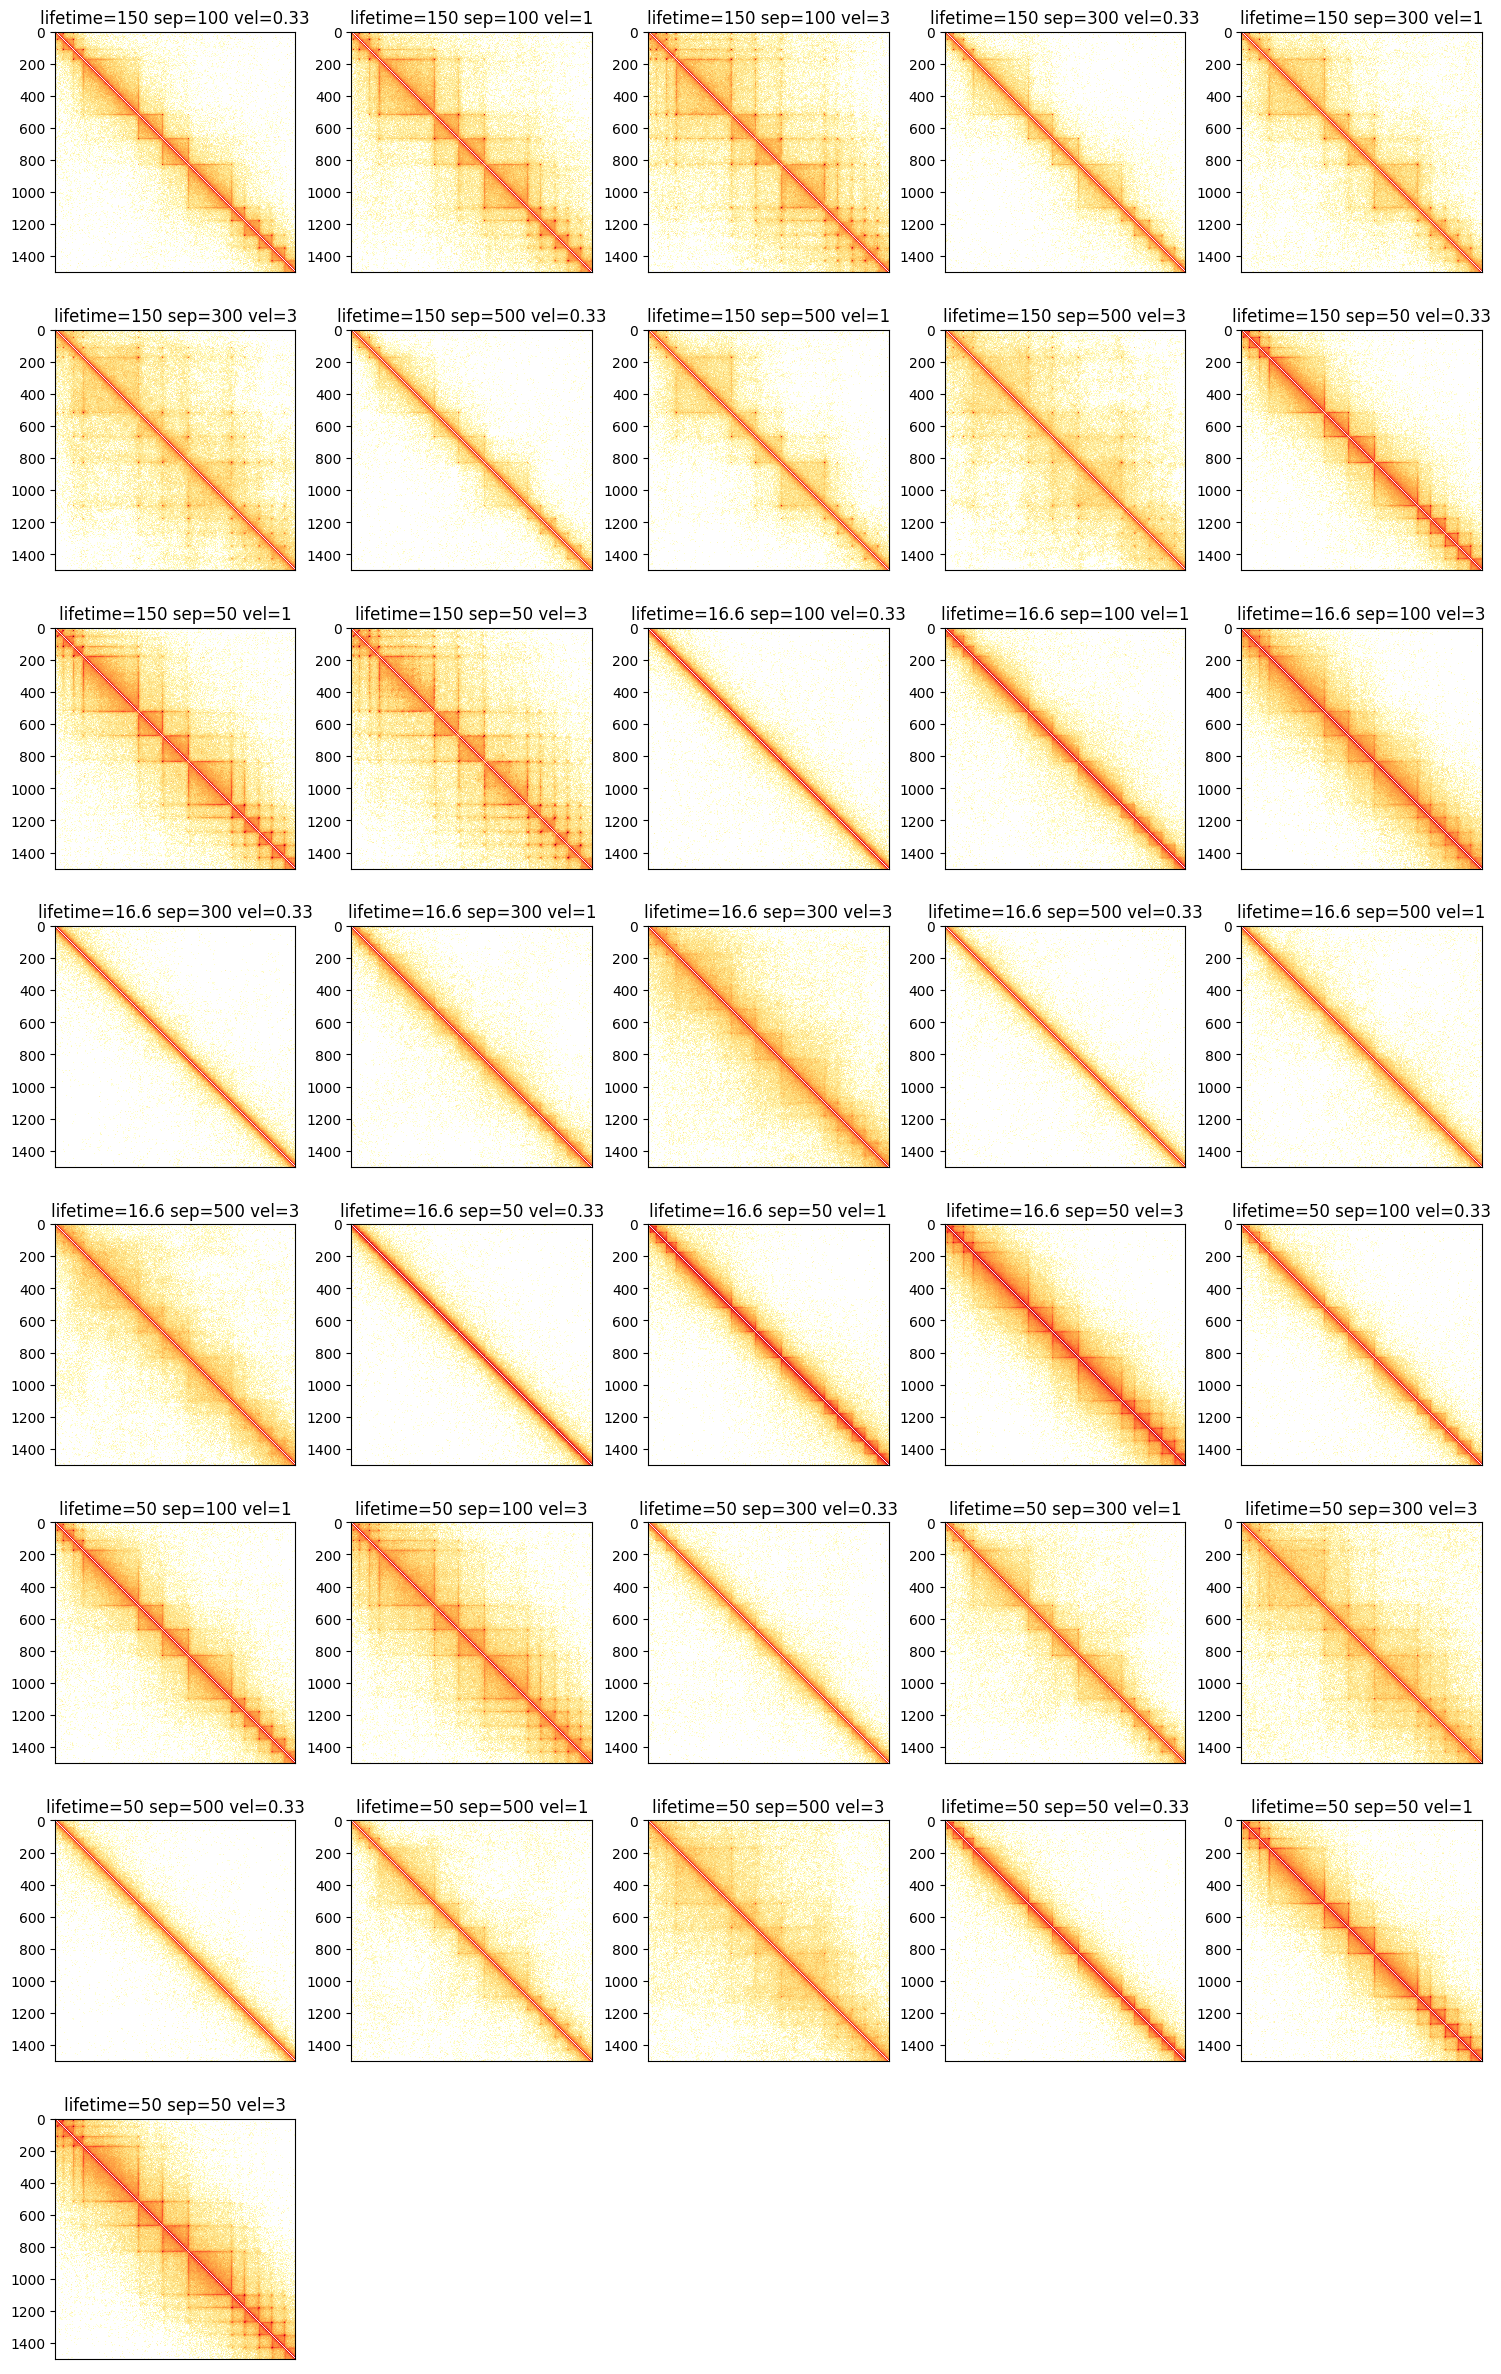

In [6]:
%matplotlib inline
numx,numy =5,8
c=0
subplot_width = 3

plt.figure(figsize=(subplot_width*numx,subplot_width*numy))

for name in list(path_dict.keys()):
    params=[ast.literal_eval(i) for i in name.split('_')[1::2]]
    Lifetime, separation, rstall,lstall, rc, lc, stalldist, steps, velocity, Tad = params
    c+=1
    plt.subplot(numy,numx, c)

    plt.title('lifetime=%s sep=%s vel=%s'%(Lifetime,separation,velocity))
    data=np.load(directory+'/analysis/maps/layout_a/%s.npz' % name)
    mrc=data['arr_0']
    #mrc = map_dict_eq[name]
    mrc  = mrc.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    vmax = np.median(np.diag(mat,2))
    vmin = vmax - 3
    plt.matshow(mat[:1500,:1500], cmap='fall', fignum=False);
    plt.xticks([])
plt.tight_layout()
plt.show()